In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:

FILE_NAME_21 = 'dataset_csv_file/train_subway21.csv'
FILE_NAME_22 = 'dataset_csv_file/train_subway22.csv'
FILE_NAME_23 = 'dataset_csv_file/train_subway23.csv'

train_subway21_df = pd.read_csv(FILE_NAME_21)
train_subway22_df = pd.read_csv(FILE_NAME_22)
train_subway23_df = pd.read_csv(FILE_NAME_23)


In [3]:
train_subway21_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway22_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway23_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']

In [4]:
train_subway_df = train_subway21_df.copy()
train_subway_df = pd.concat([train_subway_df, train_subway22_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848338,2022123119,8,2828,남위례,하선,572,-1.6,199.0,0.2,0.0,0.0,67.7,-99.0,-2.1,19
10848339,2022123120,8,2828,남위례,하선,572,-2.6,0.0,0.0,0.0,0.0,73.7,-99.0,-3.2,16
10848340,2022123121,8,2828,남위례,하선,572,-2.9,17.0,0.0,0.0,0.0,75.1,-99.0,-3.7,21
10848341,2022123122,8,2828,남위례,하선,572,-3.1,185.3,0.1,0.0,0.0,75.7,-99.0,-3.9,20


In [5]:
train_subway_df = pd.concat([train_subway_df, train_subway23_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


In [6]:
# 추가 결측치 반영 
# 풍향 변수 -9.9 -> 결측치

none_index = train_subway_df[train_subway_df['WD']==-9.9].index
train_subway_df.loc[none_index, 'WD'] = -99.0

In [7]:
train_subway_df[train_subway_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


In [8]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


### 결측치 처리

In [9]:
train_subway_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [10]:
for column in train_subway_df.columns:

    none_index = train_subway_df[train_subway_df[column]==-99.0].index
    train_subway_df.loc[none_index, column] =  None

In [11]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

### 데이터 확인

In [12]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,NaN,NaN,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,NaN,NaN,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,NaN,NaN,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,NaN,NaN,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,NaN,NaN,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,NaN,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,NaN,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,NaN,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,NaN,-1.3,18


1. 결측치 제거 후 이상치 확인

In [13]:
train_subway_dropna_df = train_subway_df.dropna()
train_subway_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [14]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

In [15]:
train_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TM              int64  
 1   Line            int64  
 2   station_number  int64  
 3   station_name    object 
 4   Direction       object 
 5   STN             int64  
 6   TA              float64
 7   WD              float64
 8   WS              float64
 9   RN_DAY          float64
 10  RN_HR1          float64
 11  HM              float64
 12  SI              float64
 13  ta_chi          float64
 14  Congestion      int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB


Congestion 추가 이상치 확인

In [16]:
# 남위례 Congestion 0 제거 

zero_index =train_subway_dropna_df[(train_subway_dropna_df['station_name']=='남위례') & (train_subway_dropna_df['Congestion']==0)].index
train_subway_dropna_0_df = train_subway_dropna_df.drop(zero_index)
train_subway_dropna_0_df.reset_index(inplace=True, drop=True)
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


### 데이터 전처리

1. 데이터 정규변환

2. 파생 변수 생성

In [17]:
train_subway_dropna_0_df['hour'] = train_subway_dropna_0_df['TM']%100

train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,hour
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10,20
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14,6
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32,7
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48,8
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13,14
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14,15
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16,16
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19,17


In [18]:
# 출퇴근 시간 구분
train_subway_dropna_0_df['is_peak_hour'] = train_subway_dropna_0_df['hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

추가 데이터 행 제거
- Congestion 0

In [ ]:
# congestion 0 제거
train_subway_dropna_0_df_delete_0 = train_subway_dropna_0_df[train_subway_dropna_0_df['Congestion']!=0]

In [ ]:
train_subway_dropna_0_df_delete_0.reset_index(drop=True, inplace=True)

### feature, target 선택

In [5]:
feature_df = train_subway_dropna_0_df_delete_0.loc[:,['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','hour','is_peak_hour']]
target_sr = train_subway_dropna_0_df_delete_0['Congestion']

print(feature_df.shape, target_sr.shape)

(9122469, 11) (9122469,)


### test, train 분리

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, target_sr, test_size=0.2, random_state=33)

In [7]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (7297975, 11), y_train : (7297975,)
x_test : (1824494, 11) , y_test : (1824494,)


STN 라벨 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

x_train['STN'] = encoder.fit_transform(x_train['STN'])
x_test['STN'] = encoder.transform(x_test['STN'])

In [9]:
x_train

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour
2199607,9,14.6,20.3,0.7,0.5,0.0,99.9,0.47,16.9,9,1
1953091,15,12.5,99.9,1.9,0.0,0.0,28.4,0.75,13.3,17,1
7460426,18,10.1,206.1,4.9,0.0,0.0,79.5,0.00,10.2,6,0
646889,16,13.4,165.7,2.0,0.0,0.0,45.8,2.50,13.6,12,0
6814194,14,-6.0,319.4,2.9,0.0,0.0,42.2,0.53,-9.6,9,1
...,...,...,...,...,...,...,...,...,...,...,...
3967037,7,7.5,180.2,0.0,0.0,0.0,74.3,0.21,5.9,8,1
2435267,49,27.9,263.5,0.8,2.0,0.0,70.8,2.73,28.9,16,0
3369618,20,23.8,290.7,1.3,0.0,0.0,82.3,0.00,26.0,6,0
5636674,22,18.8,119.5,3.8,0.0,0.0,28.4,3.51,17.3,13,0


스케일링

In [ ]:
# feature 스케일링
# MinMaxScaler 사용

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_col = ['TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','hour']


x_train[scale_col] = scaler.fit_transform(x_train[scale_col])
x_test[scale_col] = scaler.transform(x_test[scale_col])

x_train_scaled = pd.DataFrame(x_train)
x_test_scaled = pd.DataFrame(x_test)

In [11]:
x_train_scaled

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour
2199607,9,-0.144389,-1.688392,-0.943711,-0.181903,-0.133526,1.862839,-0.629329,0.039219,-1.028993,1
1953091,15,-0.342662,-0.879503,0.049766,-0.236564,-0.133526,-1.450801,-0.342527,-0.273404,1.014778,1
7460426,18,-0.569259,0.199694,2.533458,-0.236564,-0.133526,0.917409,-1.110748,-0.542608,-1.795407,0
646889,16,-0.257687,-0.210848,0.132556,-0.236564,-0.133526,-0.644404,1.449990,-0.247352,-0.262579,0
6814194,14,-2.089352,1.351040,0.877663,-0.236564,-0.133526,-0.811245,-0.567872,-2.262040,-1.028993,1
...,...,...,...,...,...,...,...,...,...,...,...
3967037,7,-0.814740,-0.063500,-1.523239,-0.236564,-0.133526,0.676417,-0.895646,-0.916020,-1.284465,1
2435267,49,1.111340,0.782988,-0.860921,-0.017921,-0.133526,0.514211,1.685578,1.081299,0.759307,0
3369618,20,0.724236,1.059393,-0.446973,-0.236564,-0.133526,1.047174,-1.110748,0.829463,-1.795407,0
5636674,22,0.252157,-0.680329,1.622771,-0.236564,-0.133526,-1.450801,2.484528,0.073955,-0.007107,0


In [12]:
x_test_scaled

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour
1443651,46,-1.683364,1.506517,-0.612552,-0.236564,-0.133526,-0.848321,-0.086453,-1.619424,-0.773522,0
4761137,21,-0.134947,0.534021,0.132556,-0.236564,-0.133526,-1.367380,1.255374,-0.160512,-0.007107,0
8884450,22,-0.106622,1.418109,-0.033024,-0.236564,-0.133526,-0.041924,-0.117182,-0.169196,-1.028993,1
3654829,39,0.969716,-0.172233,-0.281393,-0.181903,-0.133526,0.486404,-0.649815,1.020511,-1.284465,1
1699341,1,0.488196,0.254568,0.132556,-0.181903,0.231536,0.722762,-0.813702,0.525523,-0.007107,0
...,...,...,...,...,...,...,...,...,...,...,...
2148797,10,0.582612,-1.233138,-0.446973,-0.236564,-0.133526,1.566234,-1.008318,0.768675,-1.539936,1
4176081,23,-0.795857,0.336880,1.208822,-0.236564,-0.133526,-1.297863,1.531934,-0.968124,-0.262579,0
6523419,21,0.440989,0.746405,-0.198603,-0.236564,-0.133526,-0.829783,-0.629329,0.325791,1.525721,1
5652011,22,-0.503168,1.162028,-1.274870,-0.236564,-0.133526,1.353048,-1.110748,-0.386296,-1.539936,1


In [13]:
print(x_train_scaled.shape, x_test_scaled.shape)

(7297975, 11) (1824494, 11)


### 모델 학습 및 훈련

In [ ]:
from sklearn.ensemble import RandomForestRegressor

lf_model = RandomForestRegressor(random_state=3,oob_score=True)
lf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(oob_score=True, random_state=3)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# GPU 기반 예측
y_train_pred = lf_model.predict(x_train_scaled)
y_test_pred = lf_model.predict(x_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_score = lf_model.score(x_train_scaled, y_train)
test_score = lf_model.score(x_test_scaled, y_test)

print(f"Train RMSE: {train_rmse:.4f}, Test RMSE : {test_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R² : {test_r2:.4f}")

print(f'oob_score_ : {lf_model.oob_score_}')

Train RMSE: 13.8469, Test RMSE : 14.9148
Train R²: 0.5066, Test R² : 0.4284
oob_score_ : 0.427081189336487


In [38]:
# 훈련 후
depths = [tree.get_depth() for tree in lf_model.estimators_]

print(f"트리 개수: {len(depths)}")
print(f"평균 깊이: {sum(depths)/len(depths):.2f}")
print(f"최대 깊이: {max(depths)}")
print(f"최소 깊이: {min(depths)}")


트리 개수: 100
평균 깊이: 55.28
최대 깊이: 64
최소 깊이: 50


In [39]:
print(f'feature_names_in_ : {lf_model.feature_names_in_}')
print(f'n_features_in_ : {lf_model.n_features_in_}개')
print(f'feature_importances_ : {lf_model.feature_importances_}')

feature_names_in_ : ['STN' 'TA' 'WD' 'WS' 'RN_DAY' 'RN_HR1' 'HM' 'SI' 'ta_chi' 'hour'
 'is_peak_hour']
n_features_in_ : 11개


feature_importances_ : [0.35357229 0.06465634 0.08759997 0.05927366 0.01582923 0.00398952
 0.08604607 0.07927015 0.06827502 0.08456312 0.09692461]


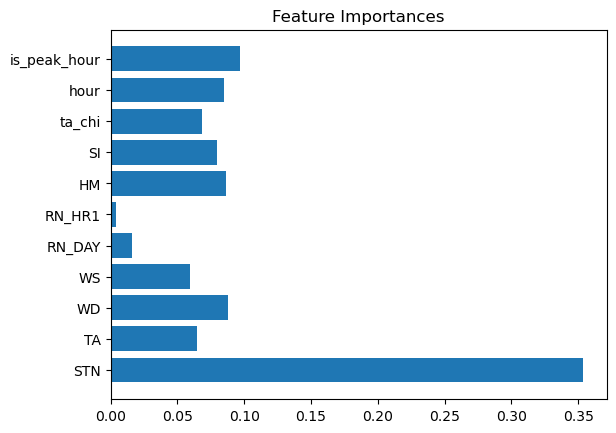

In [40]:
import matplotlib.pyplot as plt

plt.barh(range(lf_model.n_features_in_), lf_model.feature_importances_)
plt.yticks(range(lf_model.n_features_in_), lf_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

검증

In [41]:
TEST_FILE_NAME = 'dataset_csv_file/test_subway.csv'

test_subway_df = pd.read_csv(TEST_FILE_NAME, encoding="cp949")

In [42]:
test_subway_df['hour'] = test_subway_df['TM']%100

# 출퇴근 시간 구분
test_subway_df['is_peak_hour'] = test_subway_df['hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

In [46]:
test_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,hour,is_peak_hour
0,2024010100,1,150,서울역,상선,419,0.6,161.4,2.7,4.5,0.0,99.0,-99.0,-0.3,NaN,0,0
1,2024010101,1,150,서울역,상선,419,0.0,145.7,3.8,0.0,0.0,99.4,-99.0,-2.2,NaN,1,0
2,2024010102,1,150,서울역,상선,419,0.3,171.3,3.1,0.0,0.0,99.6,-99.0,-2.3,NaN,2,0
3,2024010105,1,150,서울역,상선,419,-0.1,176.0,3.0,0.0,0.0,98.1,-99.0,-0.1,NaN,5,0
4,2024010106,1,150,서울역,상선,419,-0.6,174.4,3.9,0.0,0.0,99.0,-99.0,0.0,NaN,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834747,2024123119,8,2828,남위례,하선,572,-0.2,255.7,0.2,0.0,0.0,35.1,-99.0,0.0,NaN,19,1
5834748,2024123120,8,2828,남위례,하선,572,0.0,251.6,0.2,0.0,0.0,35.1,-99.0,-0.4,NaN,20,0
5834749,2024123121,8,2828,남위례,하선,572,-2.0,0.0,0.0,0.0,0.0,41.6,-99.0,-1.7,NaN,21,0
5834750,2024123122,8,2828,남위례,하선,572,-3.0,0.0,0.0,0.0,0.0,46.0,-99.0,-2.6,NaN,22,0


In [49]:
x_test_file = test_subway_df.drop(['TM','Line','station_name','station_number','Direction','Congestion'], axis=1)
y_test_file = test_subway_df['Congestion']

In [50]:
print(f'x_test_file : {x_test_file.shape} , y_test_file : {y_test_file.shape}')

x_test_file : (5834752, 11) , y_test_file : (5834752,)


In [51]:
# feature 스케일링
# StandardScaler 사용

x_test_file[['TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','hour']] = scaler.transform(x_test_file[['TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','hour']])
x_test_scaled_file = pd.DataFrame(x_test_file, columns=x_test_file.columns)

In [52]:
# GPU 기반 예측
y_test_pred_file = lf_model.predict(x_test_scaled_file)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train RMSE: 13.8469
Train R²: 0.5066


In [56]:
y_test_pred_file = y_test_pred_file.astype(int)

In [57]:
test_subway_df['Congestion'] = y_test_pred_file

In [58]:
test_subway_df['Congestion'].unique()

array([20, 25, 18, 19, 49, 35, 26, 23, 28, 37, 43, 34, 56, 38, 30, 33, 29,
       21, 24, 32, 27, 31, 41, 48, 45, 39, 40, 17, 44, 54, 61, 47, 50, 53,
       22, 36, 46, 42, 58, 51, 55, 59, 57, 14, 15, 52, 16, 60, 64, 62, 13,
       65, 66, 63, 68, 11, 12, 67, 73, 10, 70, 69, 71,  9,  7, 74, 72,  8,
        5,  6])

In [59]:
result_Congestion_csv = pd.DataFrame(test_subway_df['Congestion'])
result_Congestion_csv.to_csv('250441.csv',encoding='utf-8-sig' )

In [60]:
result_Congestion_csv

,Congestion
0,20
1,25
2,18
3,18
4,18
...,...
5834747,31
5834748,33
5834749,31
5834750,30
